In [36]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import*

In [4]:
housing=pd.read_csv("price_paid_records.csv")

In [5]:
housing

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


In [10]:
housing[['Price']].mean()

Price    178244.212088
dtype: float64

In [24]:
trim_mean(housing['Price'], 0.05)

150506.32572056085

In [25]:
housing['Price'].median()

130000.0

In [26]:
housing['Price'].std()

390367.65348603023

In [40]:
housing['Price'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05     34950.0
0.25     75000.0
0.50    130000.0
0.75    210000.0
0.95    445000.0
Name: Price, dtype: float64

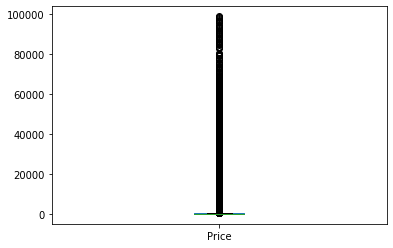

In [42]:
ax = (housing['Price']/1000).plot.box()

In [67]:
housing['Date of Transfer'].value_counts()

2016-03-31 00:00    32120
2001-06-29 00:00    26583
2002-05-31 00:00    26328
2002-06-28 00:00    26321
2003-11-28 00:00    25595
                    ...  
2009-06-07 00:00        1
2009-03-08 00:00        1
2011-12-26 00:00        1
2011-12-31 00:00        1
2008-12-25 00:00        1
Name: Date of Transfer, Length: 8212, dtype: int64

In [71]:
housing['Date of Transfer']=pd.to_datetime(housing['Date of Transfer'])

In [73]:
start_date = '01-01-2010'

In [77]:
is_london=(housing['County']=='GREATER LONDON') & (housing['Date of Transfer']>=start_date)

In [78]:
lon_house=housing[is_london]

In [86]:
print(lon_house[['Price']].mean())
print(lon_house[['Price']].std())

Price    549738.134331
dtype: float64
Price    1.456575e+06
dtype: float64


In [116]:
lon_house_normal=lon_house[(lon_house['Price']>lon_house['Price'].quantile(0.1)) & (lon_house['Price']<lon_house['Price'].quantile(0.9))]

In [118]:
print(lon_house_normal[['Price']].mean())
print(lon_house_normal[['Price']].std())

Price    395067.339426
dtype: float64
Price    163006.237382
dtype: float64
